In [164]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.metrics import mean_absolute_error, mean_squared_error
np.random.seed(42)

# HMM

In [496]:
sns.set(style="whitegrid")
ftse100 = yf.download('^FTSE', start='2010-04-01', end='2020-01-01')
ftse100.fillna(method='ffill', inplace=True)
# log returns and standardize features
ftse100['Log Returns'] = np.log(ftse100['Close'] / ftse100['Close'].shift(1))

scaler = StandardScaler()
ftse100['Returns Scaled'] = scaler.fit_transform(ftse100[['Log Returns']])
ftse100.dropna(inplace=True)

data = ftse100['Returns Scaled'].values
train_size = int(0.9 * len(data))
train_df = data[:train_size]
test_df = data[train_size:]

train_df = train_df.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed
C:\Users\uditi\AppData\Local\Temp\ipykernel_15660\687496102.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ftse100.fillna(method='ffill', inplace=True)


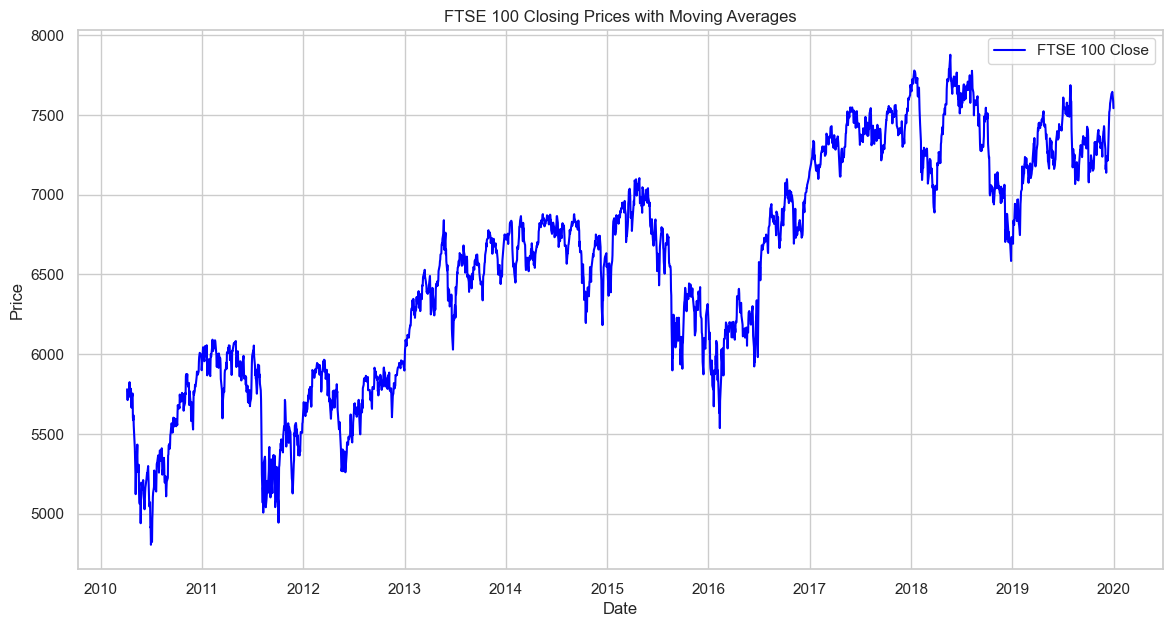

In [508]:
# Plotting the Closing Prices with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(ftse100['Close'], label='FTSE 100 Close', color='blue')
#plt.plot(ftse100['MA50'], label='50-Day MA', color='red')
#plt.plot(ftse100['MA200'], label='200-Day MA', color='green')
plt.title('FTSE 100 Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [498]:
# dictionary to store AIC and BIC scores
aic_bic_scores = []

# Iterate over n_states from 2 to 6
for n_states in range(2, 7):
    print(f"Fitting HMM with {n_states} states...")
    
    # Initialize the HMM model
    hmm_model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=2000, random_state=42)
    
    # Fit the model to the training data
    hmm_model.fit(train_df)
    
    # Compute AIC and BIC
    log_likelihood = hmm_model.score(train_df)
    n_params = n_states ** 2 + 2 * n_states - 1  # Number of parameters
    aic = (-2) * log_likelihood + 2 * n_params
    bic = (-2) * log_likelihood + n_params * np.log(len(train_df))
    
    # Append the results to the list
    aic_bic_scores.append({
        'n_states': n_states,
        'AIC': aic,
        'BIC': bic
    })

scores_df = pd.DataFrame(aic_bic_scores)

print(scores_df)

best_aic_model = scores_df.loc[scores_df['AIC'].idxmin()]
best_bic_model = scores_df.loc[scores_df['BIC'].idxmin()]

print(f"Best model based on AIC: {best_aic_model}")
print(f"Best model based on BIC: {best_bic_model}")

Fitting HMM with 2 states...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Fitting HMM with 3 states...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Fitting HMM with 4 states...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Fitting HMM with 5 states...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Fitting HMM with 6 states...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


   n_states          AIC          BIC
0         2  5942.808338  5982.726231
1         3  5944.465150  6024.300936
2         4  5838.879740  5970.038530
3         5  5853.785221  6047.672128
4         6  5871.744795  6139.764932
Best model based on AIC: n_states       4.00000
AIC         5838.87974
BIC         5970.03853
Name: 2, dtype: float64
Best model based on BIC: n_states       4.00000
AIC         5838.87974
BIC         5970.03853
Name: 2, dtype: float64


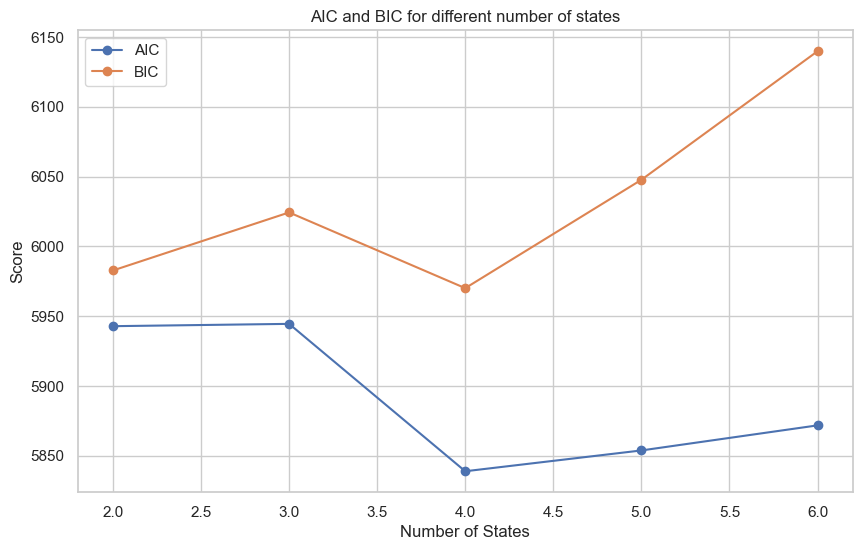

In [499]:
# Plot AIC and BIC scores
plt.figure(figsize=(10, 6))
plt.plot(scores_df['n_states'], scores_df['AIC'], label='AIC', marker='o')
plt.plot(scores_df['n_states'], scores_df['BIC'], label='BIC', marker='o')

plt.title('AIC and BIC for different number of states')
plt.xlabel('Number of States')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [500]:
ftse100['Close'].iloc[train_size]

6942.89990234375

C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Transition matrix:
[[1.99217946e-02 5.66624614e-01 4.13453591e-01 2.37611645e-13]
 [1.70095764e-03 8.66869094e-01 1.31429948e-01 3.03287737e-30]
 [2.77343286e-01 3.14165520e-06 6.98570153e-01 2.40834190e-02]
 [4.36069686e-02 1.97864455e-32 9.89350293e-28 9.56393031e-01]]


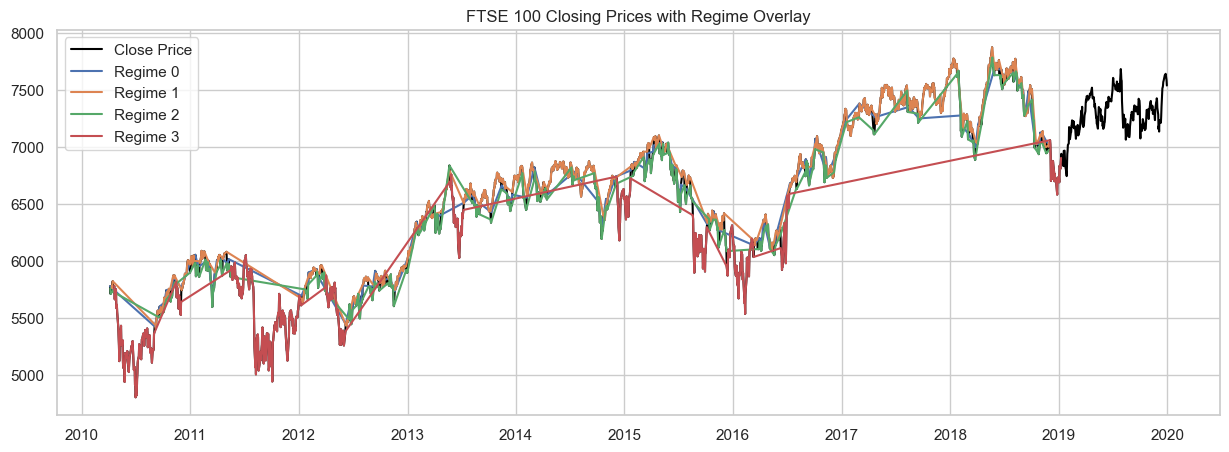

State means: Regime
0.0    0.013042
1.0    0.000947
2.0   -0.005286
3.0   -0.000480
Name: Log Returns, dtype: float64
State variances: Regime
0.0    0.000022
1.0    0.000020
2.0    0.000053
3.0    0.000223
Name: Log Returns, dtype: float64


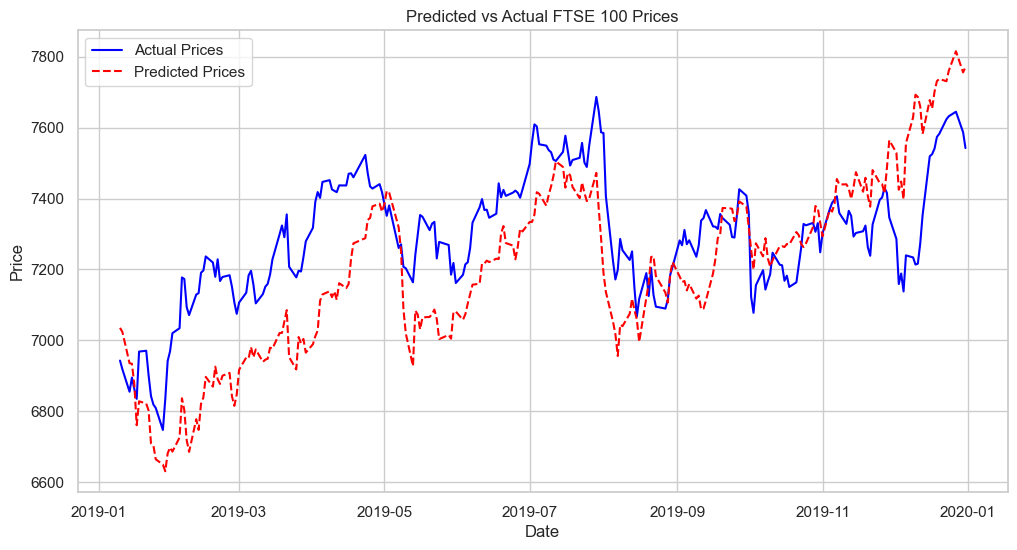

In [501]:
# best model with n_states = 2 based on AIC and BIC scores
n_states = 4  
hmm_model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000, random_state=1)
hmm_model.fit(train_df)

regimes = hmm_model.predict(train_df)

ftse100['Regime'] = np.nan  # Initialize 'Regime' column with NaN
ftse100.iloc[:train_size, ftse100.columns.get_loc('Regime')] = regimes 

transition_matrix = hmm_model.transmat_
print("Transition matrix:")
print(transition_matrix)

plt.figure(figsize=(15, 5))
plt.plot(ftse100['Close'], label='Close Price', color='black')
for regime in range(n_states):
    plt.plot(ftse100['Close'][ftse100['Regime'] == regime], label=f'Regime {regime}')
plt.legend()
plt.title('FTSE 100 Closing Prices with Regime Overlay')
plt.show()

state_means = ftse100.groupby('Regime')['Log Returns'].mean()
state_variances = ftse100.groupby('Regime')['Log Returns'].var()
print("State means:", state_means)
print("State variances:", state_variances)

# Step 13: Predict the states for the test set
test_df_reshaped = test_df.reshape(-1, 1)
predicted_test_states = hmm_model.predict(test_df_reshaped)

np.random.seed(4)

# Step 14: Predict future returns based on states
predicted_test_returns = []
for state in predicted_test_states:
    mean_return = state_means[state]
    variance_return = state_variances[state]
    predicted_return = np.random.normal(loc=mean_return, scale=np.sqrt(variance_return))
    predicted_test_returns.append(predicted_return)

# Step 15: Convert predicted returns to predicted prices
initial_price = ftse100['Close'].iloc[train_size]  # Use the last price from the training set
predicted_test_prices = [initial_price]

for ret in predicted_test_returns:
    next_price = predicted_test_prices[-1] * (1 + ret)
    predicted_test_prices.append(next_price)

# Remove the initial price from predicted prices and add it to a DataFrame
predicted_test_prices = predicted_test_prices[1:]
test_dates = ftse100.index[train_size:]  # Dates corresponding to the test set
test_predictions = pd.DataFrame({'Date': test_dates, 'Predicted Prices': predicted_test_prices})


# Step 16: Plot the predicted prices vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(ftse100.index[train_size:], ftse100['Close'][train_size:], label='Actual Prices', color='blue')
plt.plot(test_predictions['Date'], test_predictions['Predicted Prices'], label='Predicted Prices', color='red', linestyle='--')

#plt.yscale('log')
plt.title('Predicted vs Actual FTSE 100 Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [514]:
# Extract actual and predicted prices
actual_prices = ftse100['Close'].iloc[train_size:].values
predicted_prices = test_predictions['Predicted Prices'].values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_prices, predicted_prices)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = mse ** (1/2)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

# Display the metrics
print(f"MAE (Mean Absolute Error): {mae}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

MAE (Mean Absolute Error): 165.14814740239382
RMSE (Root Mean Squared Error): 196.09611198243272
MAPE (Mean Absolute Percentage Error): 2.27%


# GMM

In [518]:
# Assuming you have already fetched and processed the FTSE100 data
# You already have `ftse100` DataFrame with 'Returns Scaled' and 'Close' columns

# Split data into train and test sets
data = ftse100['Returns Scaled'].values
train_size = int(0.9 * len(data))
train_df = data[:train_size]
test_df = data[train_size:]
train_prices = ftse100['Close'][:train_size]
test_prices = ftse100['Close'][train_size:]

# Reshape data for GMM
train_df_reshaped = train_df.reshape(-1, 1)
test_df_reshaped = test_df.reshape(-1, 1)

# --------- GMM --------- #
print("Fitting GMM...")

gmm_model = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
gmm_model.fit(train_df_reshaped)

# Predict states for both train and test sets
gmm_train_states = gmm_model.predict(train_df_reshaped)
gmm_test_states = gmm_model.predict(test_df_reshaped)

# Calculate means and variances by regime for GMM
gmm_state_means = pd.Series(train_df).groupby(gmm_train_states).mean()
gmm_state_variances = pd.Series(train_df).groupby(gmm_train_states).var()

np.random.seed(42)
# Predict returns and convert to prices for GMM
gmm_predicted_prices = [train_prices.iloc[-1]]  # Start from the last training price
for state in gmm_test_states:
    ret = np.random.normal(loc=gmm_state_means[state], scale=np.sqrt(gmm_state_variances[state]))
    gmm_predicted_prices.append(gmm_predicted_prices[-1] * (1 + ret))

gmm_predicted_prices = gmm_predicted_prices[1:]


Fitting GMM...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


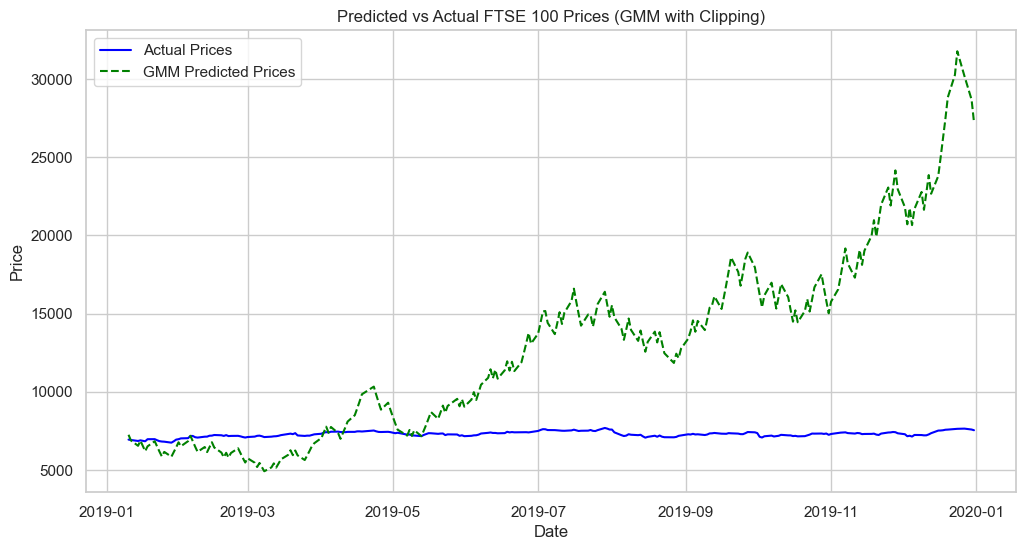

In [520]:
# Clip predicted returns to avoid extreme values
def clip_returns(predicted_return, lower_bound=-0.05, upper_bound=0.05):
    return max(min(predicted_return, upper_bound), lower_bound)

np.random.seed(42)
# Predict returns and convert to prices for GMM with clipping
gmm_predicted_prices = [train_prices.iloc[-1]]  # Start from the last training price
for state in gmm_test_states:
    ret = np.random.normal(loc=gmm_state_means[state], scale=np.sqrt(gmm_state_variances[state]))
    clipped_ret = clip_returns(ret)  # Clip the return
    gmm_predicted_prices.append(gmm_predicted_prices[-1] * (1 + clipped_ret))

gmm_predicted_prices = gmm_predicted_prices[1:]

# Plot the updated predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_prices.index, test_prices, label='Actual Prices', color='blue')
plt.plot(test_prices.index, gmm_predicted_prices, label='GMM Predicted Prices', linestyle='--', color='green')
plt.title('Predicted vs Actual FTSE 100 Prices (GMM with Clipping)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [534]:
# Calculate performance metrics for GMM
gmm_mae = mean_absolute_error(test_prices, gmm_predicted_prices)
gmm_mse = mean_squared_error(test_prices, gmm_predicted_prices)
gmm_rmse = gmm_mse ** (1/2)
gmm_mape = np.mean(np.abs((test_prices - gmm_predicted_prices) / test_prices)) * 100

# Output GMM metrics
print(f"MAE (Mean Absolute Error): {gmm_mae}")
print(f"RMSE (Root Mean Squared Error): {gmm_rmse}")
print(f"MAPE (Mean Absolute Percentage Error): {gmm_mape:.2f}%")


MAE (Mean Absolute Error): 5976.20457967886
RMSE (Root Mean Squared Error): 7994.099323875852
MAPE (Mean Absolute Percentage Error): 81.28%


# K-Means

Fitting K-Means...


C:\Users\uditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


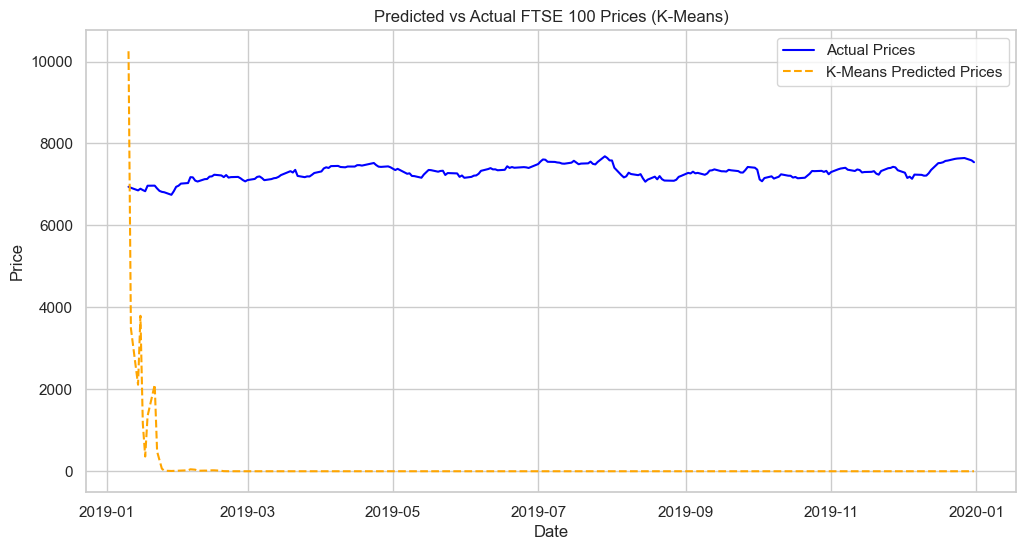

In [526]:
# Split data into train and test sets
#data = ftse100['Returns Scaled'].values
#train_size = int(0.8 * len(data))
#train_df = data[:train_size]
#test_df = data[train_size:]
#train_prices = ftse100['Close'][:train_size]
#test_prices = ftse100['Close'][train_size:]

# Reshape data for K-Means
#train_df_reshaped = train_df.reshape(-1, 1)
#test_df_reshaped = test_df.reshape(-1, 1)

# --------- K-Means --------- #
print("Fitting K-Means...")

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(train_df_reshaped)

# Predict states for both train and test sets
kmeans_train_states = kmeans_model.predict(train_df_reshaped)
kmeans_test_states = kmeans_model.predict(test_df_reshaped)

# Calculate means and variances by regime for K-Means
kmeans_state_means = pd.Series(train_df).groupby(kmeans_train_states).mean()
kmeans_state_variances = pd.Series(train_df).groupby(kmeans_train_states).var()

np.random.seed(42)
# Predict returns and convert to prices for K-Means
kmeans_predicted_prices = [train_prices.iloc[-1]]  # Start from the last training price
for state in kmeans_test_states:
    ret = np.random.normal(loc=kmeans_state_means[state], scale=np.sqrt(kmeans_state_variances[state]))
    kmeans_predicted_prices.append(kmeans_predicted_prices[-1] * (1 + ret))

kmeans_predicted_prices = kmeans_predicted_prices[1:]

# --------- Plotting Predicted vs Actual Prices --------- #
plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(test_prices.index, test_prices, label='Actual Prices', color='blue')

# Plot predicted prices for K-Means
plt.plot(test_prices.index, kmeans_predicted_prices, label='K-Means Predicted Prices', linestyle='--', color='orange')

plt.title('Predicted vs Actual FTSE 100 Prices (K-Means)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [532]:
# Calculate performance metrics for K-Means
kmeans_mae = mean_absolute_error(test_prices, kmeans_predicted_prices)
kmeans_mse = mean_squared_error(test_prices, kmeans_predicted_prices)
kmeans_rmse = kmeans_mse ** (1/2)
kmeans_mape = np.mean(np.abs((test_prices - kmeans_predicted_prices) / test_prices)) * 100

# Display the metrics
print(f"MAE (Mean Absolute Error): {kmeans_mae}")
print(f"RMSE (Root Mean Squared Error): {kmeans_rmse}")
print(f"MAPE (Mean Absolute Percentage Error): {kmeans_mape:.2f}%")

MAE (Mean Absolute Error): 7210.20934972288
RMSE (Root Mean Squared Error): 7230.579005051709
MAPE (Mean Absolute Percentage Error): 98.88%
